In [1]:
import pandas as pd 

In [2]:
df = pd.read_csv('segmentation data.csv')

In [4]:
df.shape

(2000, 8)

In [5]:
df.drop(['ID'], axis=1, inplace=True)

In [7]:
columns = df.columns 

In [19]:
df.rename(columns={'Sex' : 'is_women'},inplace=True)

In [26]:
df.rename(columns={'Marital status': 'is_married'},inplace=True)

In [11]:
for column in columns:
    print(f"{column}:\n{df[column].value_counts()}")
    print(f"Nulls : {df[column].isnull().sum()}\n")

Sex:
0    1086
1     914
Name: Sex, dtype: int64
Nulls : 0

Marital status:
0    1007
1     993
Name: Marital status, dtype: int64
Nulls : 0

Age:
26    116
27    111
25     88
24     83
28     80
35     79
23     77
31     76
36     73
29     70
30     70
32     67
33     66
34     60
40     58
37     56
38     51
22     49
42     48
39     40
46     35
21     34
41     33
43     33
45     31
44     30
49     29
48     29
47     26
50     23
20     23
57     20
52     19
51     19
54     17
53     16
63     15
64     14
60     13
61     13
58     12
65     12
56     10
55     10
67     10
66      9
62      8
68      7
71      5
19      5
59      5
74      4
18      3
70      3
73      3
75      2
72      1
76      1
Name: Age, dtype: int64
Nulls : 0

Education:
1    1386
2     291
0     287
3      36
Name: Education, dtype: int64
Nulls : 0

Income:
134377    2
136812    2
112227    2
145174    2
170113    2
         ..
101074    1
53608     1
119511    1
135567    1
129027    1
Name: 

In [192]:
X = df[['Occupation','Income',]].values

In [193]:
from sklearn.cluster import KMeans 
kmeans = KMeans(n_clusters=4,random_state=0)
kmeans.fit(X)

KMeans(n_clusters=4, random_state=0)

In [194]:
df['Cluster'] = kmeans.labels_

In [195]:
labels = kmeans.labels_
centers = kmeans.cluster_centers_

In [196]:
df.columns

Index(['is_women', 'is_married', 'Age', 'Education', 'Income', 'Occupation',
       'Settlement size', 'Cluster'],
      dtype='object')

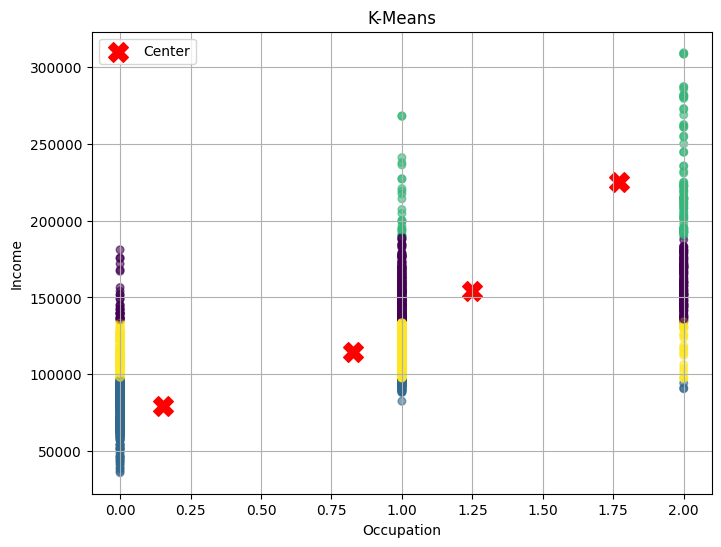

In [198]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=30, alpha=0.6)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', label='Center')
plt.title("K-Means")
plt.xlabel("Occupation")
plt.ylabel("Income")
plt.legend()
plt.grid(True)
plt.show()